In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import scipy.stats as stats
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/data-storm-10/credit_card_default_test.csv
/kaggle/input/data-storm-10/Credit_card_default - Business Problem - Assessment Criteria - Data Dictionary.xlsx
/kaggle/input/data-storm-10/credit_card_default_train.csv
/kaggle/input/data-storm-10/DATA STORM 1.0 - First Round Competition Guidlines.pdf


In [30]:
train_data = pd.read_csv('../input/data-storm-10/credit_card_default_train.csv')
test_data = pd.read_csv('../input/data-storm-10/credit_card_default_test.csv')

In [31]:
def New_balance(x):
    if x[-1]=='M':
        x=float(x[:-1])*1000000
    elif x[-1]=='K':
        x=float(x[:-1])*1000
    else:
        x=float(x)
    return(x)

In [32]:
train_data["Balance_Limit_V1_new"] = train_data["Balance_Limit_V1"].apply(New_balance)
train_data.drop("Balance_Limit_V1",axis=1,inplace=True)
train_data.rename(columns={"Balance_Limit_V1_new":"Balance_Limit_V1"},inplace=True)
train_col = list(train_data.columns)
last = train_col.pop()
train_col.insert(1,last)
train_data= train_data[train_col]

test_data["Balance_Limit_V1_new"] = test_data["Balance_Limit_V1"].apply(New_balance)
test_data.drop("Balance_Limit_V1",axis=1,inplace=True)
test_data.rename(columns={"Balance_Limit_V1_new":"Balance_Limit_V1"},inplace=True)
test_col = list(test_data.columns)
last = test_col.pop()
test_col.insert(1,last)
test_data= test_data[test_col]

In [33]:
index = train_data.pop("Client_ID")
y = train_data.pop("NEXT_MONTH_DEFAULT")

index_test = test_data.pop("Client_ID")

In [34]:
train_data["MARITAL_STATUS"].replace({"Other": "Other1"}, inplace=True)
test_data["MARITAL_STATUS"].replace({"Other": "Other1"}, inplace=True)

In [35]:
changes=["Gender","AGE","EDUCATION_STATUS","MARITAL_STATUS"]
dummies=pd.concat([pd.get_dummies(train_data[col]) for col in changes], axis=1)
train_data=pd.concat([train_data,dummies],axis=1)

[train_data.pop(col) for col in changes]
train_data.head()

,Balance_Limit_V1,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,...,M,31-45,46-65,Less than 30,More than 65,Graduate,High School,Other,Other1,Single
0,1000000.0,-1,-1,-1,-1,-1,-1,3248,3389,6004,...,1,1,0,0,0,1,0,0,1,0
1,1000000.0,0,-1,-1,-1,-1,0,353351,151818,26948,...,0,0,0,1,0,0,1,0,1,0
2,100000.0,4,3,2,2,-2,-2,16681,16082,15477,...,0,1,0,0,0,0,1,0,0,1
3,200000.0,2,0,0,0,0,0,90457,92848,95193,...,0,1,0,0,0,1,0,0,0,1
4,1000000.0,2,2,0,0,0,0,429556,419466,429785,...,0,1,0,0,0,1,0,0,1,0


In [36]:
dummies_test=pd.concat([pd.get_dummies(test_data[col]) for col in changes], axis=1)
test_data=pd.concat([test_data,dummies_test],axis=1)

[test_data.pop(col) for col in changes]
test_data.head()

,Balance_Limit_V1,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,...,M,31-45,46-65,Less than 30,More than 65,Graduate,High School,Other,Other1,Single
0,500000.0,0,0,0,0,0,0,194188,198510,128316,...,1,1,0,0,0,0,0,1,0,1
1,200000.0,0,0,0,0,0,0,87115,89427,91823,...,0,1,0,0,0,0,0,1,0,1
2,400000.0,-1,-1,2,0,0,-1,2693,9573,8984,...,1,0,0,1,0,0,0,1,1,0
3,1500000.0,1,-1,-1,-2,-2,-2,0,5775,5775,...,1,1,0,0,0,1,0,0,0,1
4,100000.0,0,0,-2,-2,-2,-2,85257,0,0,...,0,0,0,1,0,0,1,0,1,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( train_data, y, test_size=0.33 , random_state=7)

In [38]:
X_train=X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
test_data = test_data.values

In [39]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
X_train1 = scX.fit_transform(np.concatenate((X_train[:,0:1],X_train[:,7:19]),axis=1))
#X_train1 = scX.fit_transform(X_train[:,7:19])
X_test1 = scX.transform(np.concatenate((X_test[:,0:1],X_test[:,7:19]),axis=1))
test_data1 = scX.transform(np.concatenate((test_data[:,0:1],test_data[:,7:19]),axis=1))
#X_test1 = scX.transform(X_test[:,7:19])
#test_data1 = scX.transform(test_data[:,7:19])
np.shape(X_train1)

(16080, 13)

In [40]:
#X_train1 = np.concatenate((X_train1[:,0:1],np.around(X_train1[:,1:],decimals=2, out=None),X_train[:,1:7],X_train[:,19:]),axis=1)
X_train1 = np.concatenate((X_train1,X_train[:,1:7],X_train[:,19:]),axis=1)
#X_test1 = np.concatenate((X_test1[:,0:1],np.around(X_test1[:,1:],decimals=2, out=None),X_test[:,1:7],X_test[:,19:]),axis=1)
X_test1 = np.concatenate((X_test1,X_test[:,1:7],X_test[:,19:]),axis=1)
#test_data1 = np.concatenate((test_data1[:,0:1],np.around(test_data1[:,1:],decimals=2, out=None),test_data[:,1:7],test_data[:,19:]),axis=1)
test_data1 = np.concatenate((test_data1,test_data[:,1:7],test_data[:,19:]),axis=1)

In [41]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,classification_report

[0.02860018 0.02287157 0.01920582 0.01448363 0.01571721 0.01499759
 0.01082411 0.02241934 0.03180007 0.03271876 0.01356431 0.01055304
 0.01334905 0.39035043 0.11395588 0.04361359 0.04600275 0.02905862
 0.03257053 0.01387514 0.         0.01068191 0.0056152  0.00060852
 0.00551443 0.02039385 0.01335385 0.00836911 0.0149315  0.        ]


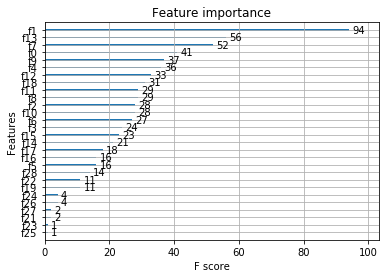

In [43]:
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance

model = XGBClassifier()
model.fit(X_train1, y_train)
print(model.feature_importances_)

#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#pyplot.show()

plot_importance(model)
pyplot.show()

In [44]:
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

thresholds = [0.0077]
#thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train1)
    # train model
    selection_model = XGBClassifier(learning_rate =0.0015,n_estimators=1000, max_depth=4, min_child_weight=7, gamma=3, subsample=0.85,
                                    colsample_bytree=0.95, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,
                                    seed=30, random_state=7)

    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test1)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.4f, n=%d, Accuracy: %.4f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


Thresh=0.0077, n=25, Accuracy: 82.1338%


In [45]:
print(classification_report(y_test,predictions , digits=4))

              precision    recall  f1-score   support

           0     0.8391    0.9529    0.8924      6159
           1     0.6868    0.3612    0.4734      1761

    accuracy                         0.8213      7920
   macro avg     0.7630    0.6570    0.6829      7920
weighted avg     0.8053    0.8213    0.7992      7920



In [46]:
select_test = selection.transform(test_data1)
prediction = selection_model.predict(select_test)
#prediction = selection_model.predict(test_data1)

In [47]:
unique, counts = np.unique(prediction, return_counts=True)
dict(zip(unique, counts))

{0: 5336, 1: 664}

In [48]:
op = {'Client_ID':index_test,'NEXT_MONTH_DEFAULT':prediction}
df = pd.DataFrame(op,columns=['Client_ID','NEXT_MONTH_DEFAULT'])
vexport_csv=df.to_csv('day3_final.csv',index=None,header=True)